In [213]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/swapnilsaurav/Dataset/master/hotel_bookings.csv"
df = pd.read_csv(url)

df

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,Resort Hotel,0.0,342.0,2015,July,27.0,1.0,0.0,0.0,...,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,01-07-2015
1,2,Resort Hotel,0.0,737.0,2015,July,27.0,1.0,0.0,0.0,...,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,10.0,Check-Out,01-07-2015
2,3,Resort Hotel,0.0,7.0,2015,July,27.0,1.0,0.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,02-07-2015
3,4,Resort Hotel,0.0,13.0,2015,July,27.0,1.0,0.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,02-07-2015
4,5,Resort Hotel,0.0,14.0,2015,July,27.0,1.0,0.0,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119386,City Hotel,0.0,23.0,2017,August,35.0,30.0,2.0,5.0,...,No Deposit,394.0,NaN,0.0,Transient,96.14,0.0,0.0,Check-Out,06-09-2017
119386,119387,City Hotel,0.0,102.0,2017,August,35.0,31.0,2.0,5.0,...,No Deposit,9.0,NaN,0.0,Transient,225.43,0.0,2.0,Check-Out,07-09-2017
119387,119388,City Hotel,0.0,34.0,2017,August,35.0,31.0,2.0,5.0,...,No Deposit,9.0,NaN,0.0,Transient,157.71,0.0,4.0,Check-Out,07-09-2017
119388,119389,City Hotel,0.0,109.0,2017,August,35.0,31.0,2.0,5.0,...,No Deposit,89.0,NaN,0.0,Transient,104.40,0.0,0.0,Check-Out,07-09-2017


In [214]:
print("="*80)
print("1) BASIC STRUCTURE")
print("="*80)
print("Shape (rows, columns):", df.shape)
print("\nColumn names:\n", df.columns.tolist())

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())



1) BASIC STRUCTURE
Shape (rows, columns): (119390, 33)

Column names:
 ['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']

First 5 rows:
   id         hotel  is_canceled  lead_time  arrival_date_year  \
0   1  Resort Hotel          0.0      342.0               2015   
1   2  Resort Hotel          0.0      737.0               2015   
2   3  Resort Hotel          0.0        7.0               2015   
3   4  Resort Hotel      

In [215]:
# --------------------------------------------
# 2) Variable types (numeric vs categorical)
# --------------------------------------------
print("\n" + "="*80)
print("2) VARIABLE TYPES")
print("="*80)

print("\nData types:")
print(df.dtypes)

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("\nNumeric columns (count={}):".format(len(num_cols)))
print(num_cols)

print("\nCategorical columns (count={}):".format(len(cat_cols)))
print(cat_cols)

# Summary stats (numeric and categorical)
print("\nNumeric summary:")
print(df[num_cols].describe().T)

print("\nCategorical summary (top categories):")
for c in cat_cols:
    print("\n---", c, "---")
    print(df[c].value_counts(dropna=False).head(10))



2) VARIABLE TYPES

Data types:
id                                  int64
hotel                              object
is_canceled                       float64
lead_time                         float64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number          float64
arrival_date_day_of_month         float64
stays_in_weekend_nights           float64
stays_in_week_nights              float64
adults                            float64
children                          float64
babies                            float64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                 float64
previous_cancellations            float64
previous_bookings_not_canceled    float64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                   float64
de

In [216]:
# --------------------------------------------
# 3) Data-quality issues: Missing values
# --------------------------------------------
print("\n" + "="*80)
print("3) DATA QUALITY: MISSING VALUES")
print("="*80)

missing_count = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
}).sort_values("missing_pct", ascending=False)

print("\nTop 20 columns by missing %:")
print(missing_table.head(20))




3) DATA QUALITY: MISSING VALUES

Top 20 columns by missing %:
                             missing_count  missing_pct
company                             112593        94.31
agent                                16353        13.70
meal                                 13703        11.48
babies                               13517        11.32
deposit_type                          9842         8.24
children                              2461         2.06
country                                502         0.42
assigned_room_type                      14         0.01
is_canceled                             10         0.01
stays_in_week_nights                    14         0.01
adults                                  14         0.01
market_segment                          14         0.01
stays_in_weekend_nights                 14         0.01
distribution_channel                    14         0.01
lead_time                               10         0.01
arrival_date_day_of_month               1

In [217]:
# --------------------------------------------
# 4) Data-quality issues: Duplicates
# --------------------------------------------
print("\n" + "="*80)
print("4) DATA QUALITY: DUPLICATES")
print("="*80)

dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)




4) DATA QUALITY: DUPLICATES
Duplicate rows: 0


In [218]:
# --------------------------------------------
# 5) Data-quality issues: High cardinality categoricals
#    (too many unique categories can explode one-hot encoding)
# --------------------------------------------
print("\n" + "="*80)
print("5) DATA QUALITY: HIGH CARDINALITY CATEGORICALS")
print("="*80)

cardinality = pd.DataFrame({
    "unique_values": df[cat_cols].nunique(dropna=True)
}).sort_values("unique_values", ascending=False)

print("\nCategorical columns sorted by unique values:")
print(cardinality)




5) DATA QUALITY: HIGH CARDINALITY CATEGORICALS

Categorical columns sorted by unique values:
                         unique_values
reservation_status_date            926
country                            177
assigned_room_type                  12
arrival_date_month                  12
reserved_room_type                  10
market_segment                       8
distribution_channel                 5
meal                                 5
customer_type                        4
deposit_type                         3
reservation_status                   3
hotel                                2


In [219]:
# --------------------------------------------
# 6) Data-quality issues: Suspicious / impossible records
# --------------------------------------------
print("\n" + "="*80)
print("6) DATA QUALITY: SUSPICIOUS RECORDS")
print("="*80)

# Guests = adults + children + babies (children may have missing)
if all(col in df.columns for col in ["adults", "children", "babies"]):
    total_guests = df["adults"] + df["children"].fillna(0) + df["babies"]
    zero_guest_rows = (total_guests == 0).sum()
    print("Rows with total_guests == 0:", zero_guest_rows)

    if zero_guest_rows > 0:
        print("\nSample suspicious rows (total_guests == 0):")
        print(df.loc[total_guests == 0, ["adults", "children", "babies"]].head(10))

# Negative or zero nights? (if columns exist)
if all(col in df.columns for col in ["stays_in_week_nights", "stays_in_weekend_nights"]):
    total_nights = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]
    zero_night_rows = (total_nights == 0).sum()
    print("\nRows with total_nights == 0:", zero_night_rows)

# ADR negative? (Average Daily Rate shouldn't be negative)
if "adr" in df.columns:
    negative_adr = (df["adr"] < 0).sum()
    print("\nRows with adr < 0:", negative_adr)




6) DATA QUALITY: SUSPICIOUS RECORDS
Rows with total_guests == 0: 173

Sample suspicious rows (total_guests == 0):
       adults  children  babies
31765     0.0       0.0     0.0
32029     0.0       0.0     0.0
32827     0.0       0.0     0.0
34849     0.0       0.0     0.0
34855     0.0       0.0     0.0
37459     0.0       0.0     0.0
40392     0.0       0.0     0.0
40922     0.0       0.0     0.0
41020     0.0       0.0     0.0
41056     0.0       0.0     0.0

Rows with total_nights == 0: 713

Rows with adr < 0: 1


In [220]:
# --------------------------------------------
# 7) Inconsistent categories checks
#    (example: whitespace, casing, unknown labels)
# --------------------------------------------
print("\n" + "="*80)
print("7) DATA QUALITY: INCONSISTENT CATEGORIES (Quick Checks)")
print("="*80)

def show_category_issues(series, colname, top=15):
    # Convert to string safely for checks
    s = series.dropna().astype(str)

    has_leading_trailing_spaces = (s != s.str.strip()).sum()
    has_mixed_case = (s.str.lower().nunique() != s.nunique())

    print(f"\nColumn: {colname}")
    print("Unique values:", series.nunique(dropna=True))
    print("Values with leading/trailing spaces:", has_leading_trailing_spaces)
    print("Possible mixed casing issue:", has_mixed_case)
    print("Top categories:")
    print(series.value_counts(dropna=False).head(top))

# Run checks on a few key categoricals (if present)
key_cat_cols = ["hotel", "meal", "market_segment", "distribution_channel", "customer_type", "deposit_type"]
for c in key_cat_cols:
    if c in df.columns:
        show_category_issues(df[c], c)




7) DATA QUALITY: INCONSISTENT CATEGORIES (Quick Checks)

Column: hotel
Unique values: 2
Values with leading/trailing spaces: 0
Possible mixed casing issue: False
Top categories:
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Column: meal
Unique values: 5
Values with leading/trailing spaces: 0
Possible mixed casing issue: False
Top categories:
meal
BB           82604
NaN          13703
HB           11344
SC           10627
Undefined      771
FB             341
Name: count, dtype: int64

Column: market_segment
Unique values: 8
Values with leading/trailing spaces: 0
Possible mixed casing issue: False
Top categories:
market_segment
Online TA        56467
Offline TA/TO    24218
Groups           19811
Direct           12603
Corporate         5295
Complementary      743
Aviation           237
NaN                 14
Undefined            2
Name: count, dtype: int64

Column: distribution_channel
Unique values: 5
Values with leading/trailing spaces: 0
Possible mixed

In [221]:
# --------------------------------------------
# 8) Quick target balance (important for choosing metrics)
# --------------------------------------------
print("\n" + "="*80)
print("8) TARGET DISTRIBUTION (CLASS BALANCE)")
print("="*80)

if "is_canceled" in df.columns:
    print(df["is_canceled"].value_counts())
    print("\nAs percentage:")
    print((df["is_canceled"].value_counts(normalize=True) * 100).round(2))



8) TARGET DISTRIBUTION (CLASS BALANCE)
is_canceled
0.0    75156
1.0    44224
Name: count, dtype: int64

As percentage:
is_canceled
0.0    62.96
1.0    37.04
Name: proportion, dtype: float64


<h2>Removing Missing Values: Numerical and Categorical<h2>

In [222]:
# --------------------------------------------
# 3) Data-quality issues: Missing values
# --------------------------------------------
print("\n" + "="*80)
print("="*80)

missing_count = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
}).sort_values("missing_pct", ascending=False)

print("\nTop 20 columns by missing %:")
print(missing_table.head(20))
print



Top 20 columns by missing %:
                             missing_count  missing_pct
company                             112593        94.31
agent                                16353        13.70
meal                                 13703        11.48
babies                               13517        11.32
deposit_type                          9842         8.24
children                              2461         2.06
country                                502         0.42
assigned_room_type                      14         0.01
is_canceled                             10         0.01
stays_in_week_nights                    14         0.01
adults                                  14         0.01
market_segment                          14         0.01
stays_in_weekend_nights                 14         0.01
distribution_channel                    14         0.01
lead_time                               10         0.01
arrival_date_day_of_month               14         0.01
arrival_date_week

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [223]:
df_clean = df.copy()
df_clean = df_clean.drop(columns=['company'])

In [224]:
# --------------------------------------------
# 3) Data-quality issues: Missing values
# --------------------------------------------
print("\n" + "="*80)
print("="*80)

missing_count = df_clean.isna().sum()
missing_pct = (df_clean.isna().mean() * 100).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
}).sort_values("missing_pct", ascending=False)

print("\nTop 20 columns by missing %:")
missing_table.head(20)



Top 20 columns by missing %:


,missing_count,missing_pct
agent,16353,13.70
meal,13703,11.48
babies,13517,11.32
deposit_type,9842,8.24
children,2461,2.06
country,502,0.42
lead_time,10,0.01
is_canceled,10,0.01
adults,14,0.01
stays_in_week_nights,14,0.01


In [225]:
# Count missing values per row
df_clean['missing_values_per_row'] = df_clean.isna().sum(axis=1)

# Display summary
print(df_clean['missing_values_per_row'].describe())

# Show sample rows with missing values
df_clean[df_clean['missing_values_per_row'] > 0].head()

(df_clean['missing_values_per_row'] > 0).sum()


count    119390.000000
mean          0.474730
std           0.853259
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          28.000000
Name: missing_values_per_row, dtype: float64


np.int64(37448)

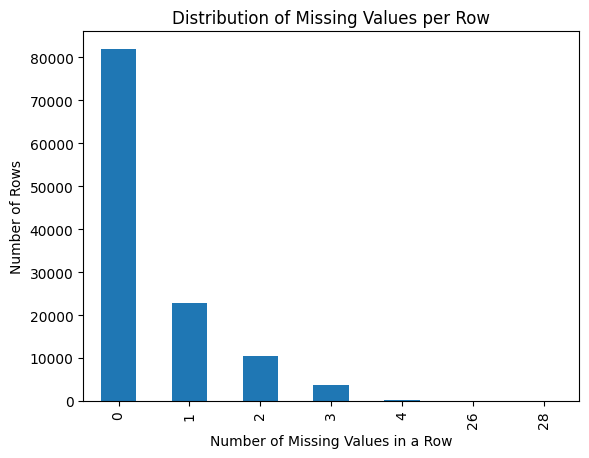

In [226]:
import matplotlib.pyplot as plt

# Ensure missing count per row exists
df_clean['missing_values_per_row'] = df_clean.isna().sum(axis=1)

# Count how many rows fall into each missing-value count
missing_row_distribution = df_clean['missing_values_per_row'].value_counts().sort_index()

# Plot bar chart
plt.figure()
missing_row_distribution.plot(kind='bar')

plt.xlabel("Number of Missing Values in a Row")
plt.ylabel("Number of Rows")
plt.title("Distribution of Missing Values per Row")

plt.show()


In [227]:
df_clean = df_clean[df_clean['missing_values_per_row'] <= 25]


In [228]:
# --------------------------------------------
# 3) Data-quality issues: Missing values
# --------------------------------------------
print("\n" + "="*80)
print("3) DATA QUALITY: MISSING VALUES")
print("="*80)

missing_count = df_clean.isna().sum()
missing_pct = (df_clean.isna().mean() * 100).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
}).sort_values("missing_pct", ascending=False)

print("\nTop 20 columns by missing %:")
print(missing_table.head(20))


3) DATA QUALITY: MISSING VALUES

Top 20 columns by missing %:
                           missing_count  missing_pct
agent                              16339        13.69
meal                               13689        11.47
babies                             13503        11.31
deposit_type                        9828         8.23
children                            2447         2.05
country                              488         0.41
id                                     0         0.00
hotel                                  0         0.00
is_canceled                            0         0.00
stays_in_weekend_nights                0         0.00
arrival_date_day_of_month              0         0.00
arrival_date_week_number               0         0.00
arrival_date_month                     0         0.00
stays_in_week_nights                   0         0.00
adults                                 0         0.00
lead_time                              0         0.00
arrival_date_year  

In [229]:
df_clean['children'] = df_clean['children'].fillna(0)
df_clean['country'] = df_clean['country'].fillna('UNK')
df_clean['agent'] = df_clean['agent'].fillna(0)

df_clean['total_guests'] = (
    df_clean['adults'] + df_clean['children'] + df_clean['babies']
)

df_clean = df_clean[df_clean['total_guests'] > 0]
df_clean

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,missing_values_per_row,total_guests
0,1,Resort Hotel,0.0,342.0,2015,July,27.0,1.0,0.0,0.0,...,0.0,0.0,Transient,0.00,0.0,0.0,Check-Out,01-07-2015,1,2.0
1,2,Resort Hotel,0.0,737.0,2015,July,27.0,1.0,0.0,0.0,...,0.0,0.0,Transient,0.00,0.0,10.0,Check-Out,01-07-2015,1,2.0
2,3,Resort Hotel,0.0,7.0,2015,July,27.0,1.0,0.0,1.0,...,0.0,0.0,Transient,75.00,0.0,0.0,Check-Out,02-07-2015,1,1.0
3,4,Resort Hotel,0.0,13.0,2015,July,27.0,1.0,0.0,1.0,...,304.0,0.0,Transient,75.00,0.0,0.0,Check-Out,02-07-2015,0,1.0
4,5,Resort Hotel,0.0,14.0,2015,July,27.0,1.0,0.0,2.0,...,240.0,0.0,Transient,98.00,0.0,1.0,Check-Out,03-07-2015,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119386,City Hotel,0.0,23.0,2017,August,35.0,30.0,2.0,5.0,...,394.0,0.0,Transient,96.14,0.0,0.0,Check-Out,06-09-2017,0,2.0
119386,119387,City Hotel,0.0,102.0,2017,August,35.0,31.0,2.0,5.0,...,9.0,0.0,Transient,225.43,0.0,2.0,Check-Out,07-09-2017,0,3.0
119387,119388,City Hotel,0.0,34.0,2017,August,35.0,31.0,2.0,5.0,...,9.0,0.0,Transient,157.71,0.0,4.0,Check-Out,07-09-2017,0,2.0
119388,119389,City Hotel,0.0,109.0,2017,August,35.0,31.0,2.0,5.0,...,89.0,0.0,Transient,104.40,0.0,0.0,Check-Out,07-09-2017,0,2.0


In [230]:
cat_cols = df_clean.select_dtypes(include='object').columns
print("Categorical Columns:")
print(cat_cols.tolist())

# Replace missing categorical values with explicit label
df_clean[cat_cols] = df_clean[cat_cols].fillna("UNK")


Categorical Columns:
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


<h2>Scale and normalize numeric variables</h2>

In [231]:
from sklearn.preprocessing import StandardScaler

num_cols = df_clean.select_dtypes(include=['int64','float64']).columns
#remove the target column
num_cols = num_cols.drop('is_canceled')
print(num_cols)

scaler = StandardScaler()

df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

df_clean


Index(['id', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'missing_values_per_row', 'total_guests'],
      dtype='object')


,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,missing_values_per_row,total_guests
0,-2.171593,Resort Hotel,0.0,2.236856,-1.677140,July,0.000685,-1.688273,-0.912332,-1.341579,...,-0.615827,-0.135506,Transient,-2.087700,-0.260758,-0.260790,Check-Out,01-07-2015,1.712373,0.075282
1,-2.171560,Resort Hotel,0.0,5.913604,-1.677140,July,0.000685,-1.688273,-0.912332,-1.341579,...,-0.615827,-0.135506,Transient,-2.087700,-0.260758,4.567046,Check-Out,01-07-2015,1.712373,0.075282
2,-2.171527,Resort Hotel,0.0,-0.881398,-1.677140,July,0.000685,-1.688273,-0.912332,-0.776331,...,-0.615827,-0.135506,Transient,-0.553293,-0.260758,-0.260790,Check-Out,02-07-2015,1.712373,-1.483750
3,-2.171495,Resort Hotel,0.0,-0.825549,-1.677140,July,0.000685,-1.688273,-0.912332,-0.776331,...,2.509686,-0.135506,Transient,-0.553293,-0.260758,-0.260790,Check-Out,02-07-2015,-0.527283,-1.483750
4,-2.171462,Resort Hotel,0.0,-0.816241,-1.677140,July,0.000685,-1.688273,-0.912332,-0.211083,...,1.851683,-0.135506,Transient,-0.082741,-0.260758,0.221994,Check-Out,03-07-2015,-0.527283,0.075282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1.732437,City Hotel,0.0,-0.732467,1.177693,August,0.584825,1.619825,1.171275,1.484661,...,3.435002,-0.135506,Transient,-0.120794,-0.260758,-0.260790,Check-Out,06-09-2017,-0.527283,0.075282
119386,1.732470,City Hotel,0.0,0.002883,1.177693,August,0.584825,1.733897,1.171275,1.484661,...,-0.523295,-0.135506,Transient,2.524320,-0.260758,0.704777,Check-Out,07-09-2017,-0.527283,1.634314
119387,1.732503,City Hotel,0.0,-0.630076,1.177693,August,0.584825,1.733897,1.171275,1.484661,...,-0.523295,-0.135506,Transient,1.138852,-0.260758,1.670344,Check-Out,07-09-2017,-0.527283,0.075282
119388,1.732535,City Hotel,0.0,0.068040,1.177693,August,0.584825,1.733897,1.171275,1.484661,...,0.299208,-0.135506,Transient,0.048195,-0.260758,-0.260790,Check-Out,07-09-2017,-0.527283,0.075282


<h2> Feature Engineering and Feature Selection</h2>

<h4>PART 1: FEATURE ENGINEERING – DIFFERENT APPROACHES<h4>

In [232]:
df_fe = df_clean.copy()

#Domain-Driven Feature Engineering (Business Logic)

df_fe['total_guests'] = (
    df_fe['adults'] + df_fe['children'] + df_fe['babies']
)

df_fe['total_nights'] = (
    df_fe['stays_in_week_nights'] + df_fe['stays_in_weekend_nights']
)

df_fe['booking_pressure'] = df_fe['lead_time'] / (df_fe['total_nights'] + 1)

df_fe[['total_guests','total_nights','booking_pressure']].head()


,total_guests,total_nights,booking_pressure
0,-0.023222,-2.253911,-1.783903
1,-0.023222,-2.253911,-4.716126
2,-2.045220,-1.688663,1.279868
3,-2.045220,-1.688663,1.198770
4,-0.023222,-1.123415,6.613780


In [233]:
#Frequency-Based Feature Engineering (Categorical Insight)
market_freq = df_fe['market_segment'].value_counts(normalize=True)

df_fe['market_segment_freq'] = df_fe['market_segment'].map(market_freq)

df_fe[['market_segment','market_segment_freq']].head()


,market_segment,market_segment_freq
0,Direct,0.107455
1,Direct,0.107455
2,Direct,0.107455
3,Corporate,0.045478
4,Online TA,0.466897


<h4>PART 2: FEATURE SELECTION – DIFFERENT METHODS</h4>

In [234]:
#Variance-Based Feature Selection
from sklearn.feature_selection import VarianceThreshold

num_data = df_fe.select_dtypes(include=['int64','float64'])

vt = VarianceThreshold(threshold=0.01)
X_var = vt.fit_transform(num_data)

selected_features = num_data.columns[vt.get_support()]
print("Selected numeric features:", selected_features.tolist())


Selected numeric features: ['id', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'missing_values_per_row', 'total_guests', 'total_nights', 'booking_pressure', 'market_segment_freq']


In [235]:
#Correlation-Based Feature Selection
import numpy as np

corr_matrix = num_data.corr().abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr_features = [
    col for col in upper_triangle.columns
    if any(upper_triangle[col] > 0.9)
]

print("Highly correlated features to consider dropping:", high_corr_features)


Highly correlated features to consider dropping: []


In [236]:
#Model-Based Feature Selection (Embedded Method)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

X = df_fe.drop(columns=['is_canceled'])
y = df_fe['is_canceled']

y

model = LogisticRegression(max_iter=2000)
selector = SelectFromModel(model)

selector.fit(X.select_dtypes(include=['int64','float64']), y)

selected_model_features = X.select_dtypes(
    include=['int64','float64']
).columns[selector.get_support()]

print("Model-selected features:", selected_model_features.tolist())


Model-selected features: ['id', 'arrival_date_year', 'previous_cancellations', 'previous_bookings_not_canceled', 'agent', 'required_car_parking_spaces', 'missing_values_per_row']


<h2>Apply PCA / SVD for Compression and Visualization<h2>

<h4>WAY 1: PCA on Numeric Features (Compression + Visualization)<h4>

In [237]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select scaled numeric features
num_data = df_fe.select_dtypes(include=['int64','float64'])

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(num_data)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.44939312 0.10501377]
Total variance explained: 0.5544068852830972


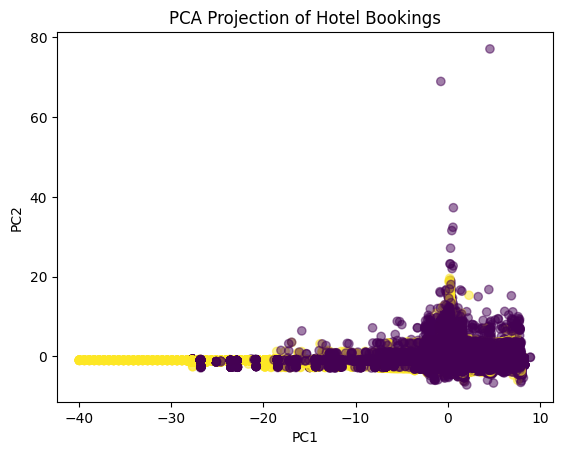

In [238]:
#Visualization
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_fe['is_canceled'], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Hotel Bookings")
plt.show()


<h4>WAY 2: PCA for Feature Compression (Before Modeling)</h4>



In [239]:
pca = PCA(n_components=0.95, random_state=42)  # retain 95% variance
X_pca_full = pca.fit_transform(num_data)

print("Original features:", num_data.shape[1])
print("Reduced features:", X_pca_full.shape[1])


Original features: 25
Reduced features: 17


<h4>WAY 3: SVD on One-Hot Encoded Categorical Data</h4>

In [240]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD

cat_cols = df_fe.select_dtypes(include='object').columns

encoder = OneHotEncoder(handle_unknown='ignore')
X_cat = encoder.fit_transform(df_fe[cat_cols])

svd = TruncatedSVD(n_components=50, random_state=42)
X_cat_svd = svd.fit_transform(X_cat)

print("Original categorical dimensions:", X_cat.shape[1])
print("Reduced categorical dimensions:", X_cat_svd.shape[1])
print("Variance captured:", svd.explained_variance_ratio_.sum())


Original categorical dimensions: 1148
Reduced categorical dimensions: 50
Variance captured: 0.8294732628200826


<h4> WAY 4: Combined PCA/SVD Pipeline (Numeric + Categorical)</h4>

In [242]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_cols = df_fe.select_dtypes(include=['int64','float64']).columns
cat_cols = df_fe.select_dtypes(include=['object']).columns

print("Dataframe shape before applying dataframe:",df_fe.shape)

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=0.95))
        ]), num_cols),
        
        ("cat", Pipeline([
            ("onehot", OneHotEncoder(handle_unknown='ignore')),
            ("svd", TruncatedSVD(n_components=50))
        ]), cat_cols)
    ]
)

# lets drop the target column from the main dataset for the pipeline
#df_fe = df_fe.drop(columns=['is_canceled'])
df_fe
X_reduced = preprocess.fit_transform(df_fe)
print("Dataframe shape after applying dataframe:",X_reduced.shape)


Dataframe shape before applying dataframe: (105700, 36)
Dataframe shape after applying dataframe: (105700, 69)


<h2>Identify Anomalies using LOF and Isolation Forest</h2>

<h4>WAY 1: Isolation Forest on Numeric Features</h4>

In [243]:
from sklearn.ensemble import IsolationForest

# Select numeric features only
num_data = df_fe.select_dtypes(include=['int64','float64'])

iso = IsolationForest(
    n_estimators=200,
    contamination=0.02,
    random_state=42
)

df_fe['anomaly_iso'] = (iso.fit_predict(num_data) == -1).astype(int)

df_fe['anomaly_iso'].value_counts()


anomaly_iso
0    103586
1      2114
Name: count, dtype: int64

<h4>WAY 2: LOF on Scaled Numeric Features </h4>

In [244]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_data)

lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.02
)

df_fe['anomaly_lof'] = (lof.fit_predict(num_scaled) == -1).astype(int)

df_fe['anomaly_lof'].value_counts()



anomaly_lof
0    103586
1      2114
Name: count, dtype: int64

<h4>WAY 3: Visual Anomaly Detection using PCA + Outlier Flags</h4>

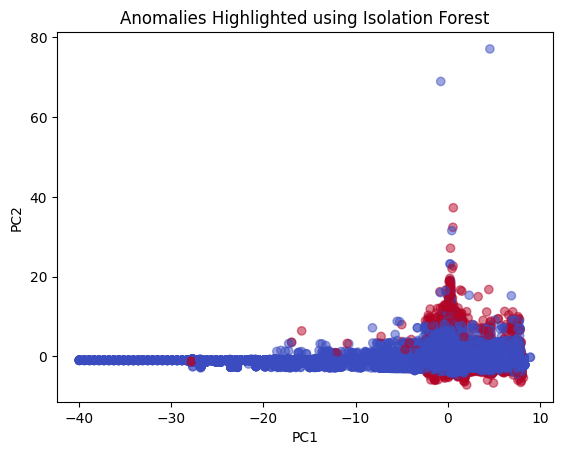

In [245]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(num_data)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_fe['anomaly_iso'], cmap='coolwarm', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Anomalies Highlighted using Isolation Forest")
plt.show()


<h4>WAY 4: Using Anomaly Scores Instead of Hard Labels</h4>

In [246]:
df_fe['iso_score'] = iso.decision_function(num_data)

df_fe[['iso_score']].describe()


,iso_score
count,105700.000000
mean,0.124289
std,0.045933
min,-0.144105
25%,0.101936
50%,0.134581
75%,0.158035
max,0.195607
